In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16088, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 16088 (delta 10), reused 14 (delta 2), pack-reused 16056
Receiving objects: 100% (16088/16088), 14.72 MiB | 5.43 MiB/s, done.
Resolving deltas: 100% (11042/11042), done.


In [4]:
cd yolov5/

/home/parallels/jupyter/GarbageCollector/yolov5


In [5]:
pip install pickleshare


Note: you may need to restart the kernel to use updated packages.


In [5]:
pwd

'/home/parallels/jupyter/GarbageCollector/yolov5'

In [6]:
pip install -r requirements.txt

  Using cached GitPython-3.1.40-py3-none-any.whl.metadata (12 kB)
  Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (5.8 kB)
  Using cached numpy-1.26.2-cp310-cp310-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (62 kB)
  Using cached opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (19 kB)
  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (112 kB)
  Using cached torch-2.1.1-cp310-cp310-manylinux2014_aarch64.whl.metadata (25 kB)
  Using cached torchvision-0.16.1-cp310-cp310-manylinux2014_aarch64.whl.metadata (6.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00
  Using cached pandas-2.1.3-cp310-cp310-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (18 kB)
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using ca

In [7]:
from PIL import Image
import torch


In [8]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True)

/home/parallels/jupyter/environment/lib/python3.10/site-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/parallels/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-12-7 Python-3.10.12 torch-2.1.1 CPU

Fusing layers... 
Model summary: 291 layers, 20891523 parameters, 0 gradients, 48.3 GFLOPs
Adding AutoShape... 


In [10]:
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

In [198]:
inputs = [
    [Image.open('images/single/glass.jpg'), 0.3, 10],
    [Image.open('images/single/paper.jpg'), 0.09, 80],
    [Image.open('images/single/biodegradable.jpg'), 0.01, 95],
    [Image.open('images/single/plastic.jpg'), 0.2, 5],
    [Image.open('images/single/cardboard.jpg'), 0.15, 70],
    [Image.open('images/single/metal.jpg'), 0.9, 15]
]

In [59]:
import numpy as np

In [186]:

class GarbageSorter:

    garbageName = ""
    confidence = 0.0
    bbox = np.empty((0,4))

    def __init__(self, model, li:list):
        self.img = li[0]
        self.inductiveSensorVal = li[1]
        self.moistureSensorVal = li[2]

        # display(self.img)
        # print(self.inductiveSensorVal)
        # print(self.moistureSensorVal)
        
        self.inductiveThreshold = 0.5
        self.moistureThreshold = 30 
        self.confidenceThreshold = 0.7

    
    def infer(self):
        results = model(self.img)
        results.show()
        # results.print()

        for det in results.xyxy[0]:
            class_index = int(det[-1])  # Class index
            self.garbageName = model.names[class_index]  # Class label
            self.confidence = det[-2].item()  # Confidence score
            self.bbox = det[:-2].cpu().numpy() 

    def checkMetal(self):
        if (self.inductiveSensorVal > self.inductiveThreshold):
            return 1
        else:
            return 0

    def checkMoisture(self):
        if (self.moistureSensorVal > self.moistureThreshold):
            print("Wet", end=" ")
        else:
            print("Dry", end=" ")

    def checkTrash(self):
        if (self.confidence > self.confidenceThreshold):
            return 0
        else: 
            return 1
    
        
    def displayName(self):
        return self.garbageName

    def displayPosition(self):
        # print(self.confidence)  
        return self.bbox




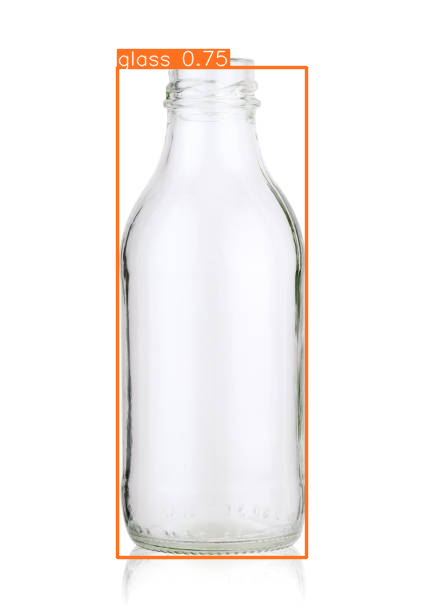

Dry glass at  [     117.07      67.295       306.8      557.66]


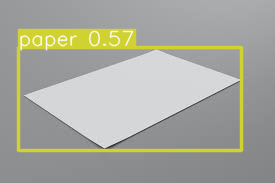

Wet Trash at  [     18.857      47.308      241.99      150.54]


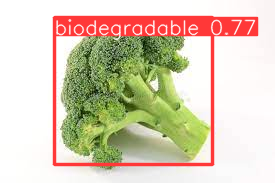

Wet biodegradable at  [     54.798      17.179      212.25      164.16]


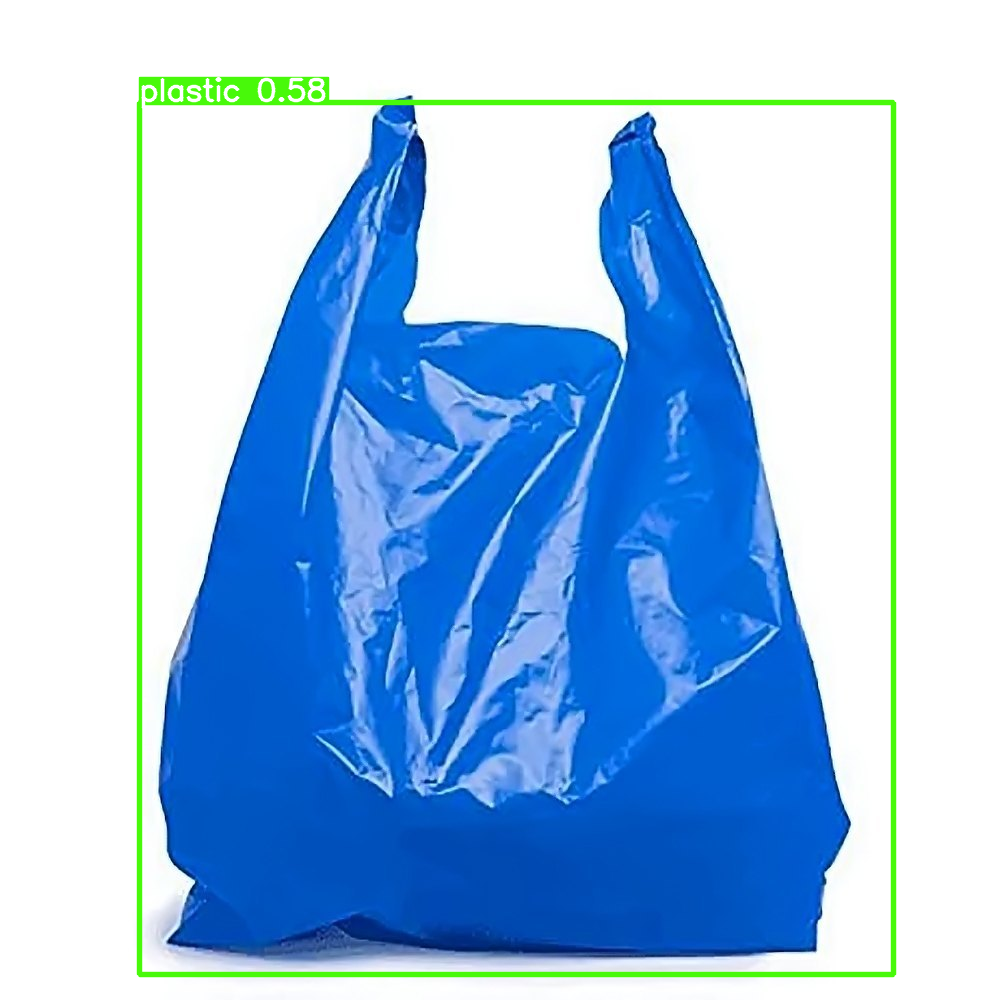

Dry Trash at  [     139.77      102.52      893.41      974.33]


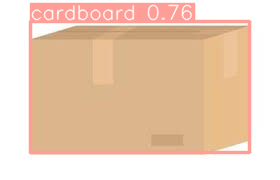

Wet cardboard at  [     30.098       21.67      249.23      152.29]


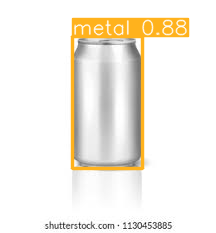

Dry Metal at  [      72.21      36.303      142.52      168.44]


In [199]:
for input in inputs:
    newGarbage = GarbageSorter(model, input)
    newGarbage.infer()
    newGarbage.checkMoisture()
    if (newGarbage.checkMetal()):
        print("Metal", end="")
    elif (newGarbage.checkTrash()):
        print("Trash", end="")
    else :
        print(newGarbage.displayName(), end="")

    print(" at ", newGarbage.displayPosition())
    
    